<p style="font-size:8px;">&copy;2024 benoit : <b>April 8, 2024</b></p>

<img src="images/berkleybrief.jpg"/>
<div style="height: 50px;color:#3B7EA1; font-size:24px; vertical-align:top; text-align:left;">
    Computing for Data Science
    <img style="width:20%; vertical-align:top; float: left; padding-right: 20px; display: block; margin-left: 0; margin-right: auto;" 
         src="images/ucb_logo.png"/>
</div>

<h1>Week 13 ... Pandas and the Big Picture</h1>
<p>
This week you worked with Pandas and common activities:
    <ol><li>csv files</li>
<li>series groupby</li>
<li>dataframe group by</li>
<li>data ggregation</li>
<li>split-apply-combine</li>
<li>pivot tables and crosstabs</li>
<li>and more</li></ol></p>
<h2>We&rsquo;ll look at a couple of datasets, some plots, and a final review.</h2>

<hr />
<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Working up an example to start</i></p>

In [14]:
# Reading in a file
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

print("1. Load the file (read_csv); there's also read_json()")
# file:///Users/tom/mystuff/..."
# http://xxx
# sftp://
# https:// ... 
Customers = pd.read_csv('datasets/customers-100.csv')
print(type(Customers))

1. Load the file (read_csv); there's also read_json()
<class 'pandas.core.frame.DataFrame'>


<blockquote><span style="color:red;">&uarr;</span> Say, why would you have .json data?  What about data on the Net?  Is this read_csv portable?</blockquote>

In [5]:
print("2. Get to know the data ... .shape")
print(Customers.shape)

2. Get to know the data ... .shape
(100, 12)


In [6]:
print("3. Fixup or clean the data for comparison... ")
Customers.columns = Customers.columns.str.replace('\.*\s+', '_').str.lower()
print(Customers.columns)

3. Fixup or clean the data for comparison... 
Index(['index', 'customer id', 'first name', 'last name', 'company', 'city',
       'country', 'phone 1', 'phone 2', 'email', 'subscription date',
       'website'],
      dtype='object')


In [7]:
print("4. Know your columns ... ")
print(Customers.head())

4. Know your columns ... 
   index      customer id first name last name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           company               city  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      country                 phone 1                phone 2  \
0                       Chile            229.077.5154       397.884.0519x718   
1                    Djibouti              5153435776       686-620-1820x944   
2         Antigua and Barbuda         +1-539-402-0259    (496)978-3969x58947   
3         

In [8]:
# counts of something of interest
print("5. Ask questions of your data - some preliminaries ... ")
print(Customers.country.value_counts())

5. Ask questions of your data - some preliminaries ... 
country
Solomon Islands                     4
Saint Vincent and the Grenadines    2
Bulgaria                            2
Oman                                2
Netherlands                         2
                                   ..
United States of America            1
Liechtenstein                       1
Denmark                             1
Tanzania                            1
Honduras                            1
Name: count, Length: 85, dtype: int64


In [9]:
# set up the series using groupby()
print("6. Maybe extract a group and then group by another column?")
score_by_company = Customers.city.groupby(Customers.company)

6. Maybe extract a group and then group by another column?


<hr /><p>Notice below the use of .size() to return the # of rows.  But wow, notice the use of 
max() that returns a list of strings!  [That's because Python views strings as their numeric  equivalents.]  BUT notice they're not numbers so methods like <code>mean()</code> will fail.</p>

In [10]:
print("-"*30)
print("7. For statistics, you'll want to know the n")
print(score_by_company.size())
print(score_by_company.max())

------------------------------
7. For statistics, you'll want to know the n
company
Acosta, Petersen and Morrow    1
Adkins-Salinas                 1
Anderson Ltd                   1
Beck-Hendrix                   1
Blankenship-Arias              1
                              ..
Ware, Burns and Oneal          1
Warren Ltd                     1
Waters, Chase and Aguilar      1
Watts-Donaldson                1
Winters-Mendoza                1
Name: city, Length: 99, dtype: int64
company
Acosta, Petersen and Morrow          West Samuel
Adkins-Salinas                     Port Annatown
Anderson Ltd                           West John
Beck-Hendrix                          Elaineberg
Blankenship-Arias                      Coreybury
                                     ...        
Ware, Burns and Oneal               New Bradview
Warren Ltd                              Hartbury
Waters, Chase and Aguilar       West Marthaburgh
Watts-Donaldson                    Veronicamouth
Winters-Mendoza   

<hr />
<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Another file demo</i></p>

<p>In this new dataset about people - notice what can and cannot be usefully grouped without being "cleaned".  The phone #s resist being grouped.</p>

In [11]:
People = pd.read_csv('datasets/people-100.csv')
print(type(People))
print(People.head())
People

<class 'pandas.core.frame.DataFrame'>
   Index          User Id First Name Last Name     Sex  \
0      1  88F7B33d2bcf9f5     Shelby   Terrell    Male   
1      2  f90cD3E76f1A9b9    Phillip   Summers  Female   
2      3  DbeAb8CcdfeFC2c   Kristine    Travis    Male   
3      4  A31Bee3c201ef58    Yesenia  Martinez    Male   
4      5  1bA7A3dc874da3c       Lori      Todd    Male   

                        Email                   Phone Date of birth  \
0        elijah57@example.net  001-084-906-7849x73518    1945-10-26   
1       bethany14@example.com       214.112.6044x4913    1910-03-24   
2       bthompson@example.com            277.609.7938    1992-07-02   
3   kaitlinkaiser@example.com            584.094.6111    2017-08-03   
4  buchananmanuel@example.net       689-207-3558x7233    1938-12-01   

            Job Title  
0     Games developer  
1      Phytotherapist  
2           Homeopath  
3   Market researcher  
4  Veterinary surgeon  


Index          User Id First Name  Last Name     Sex  \
0       1  88F7B33d2bcf9f5     Shelby    Terrell    Male   
1       2  f90cD3E76f1A9b9    Phillip    Summers  Female   
2       3  DbeAb8CcdfeFC2c   Kristine     Travis    Male   
3       4  A31Bee3c201ef58    Yesenia   Martinez    Male   
4       5  1bA7A3dc874da3c       Lori       Todd    Male   
..    ...              ...        ...        ...     ...   
95     96  5eFda7caAeB260E     Dennis     Barnes  Female   
96     97  CCbFce93d3720bE      Steve  Patterson  Female   
97     98  2fEc528aFAF0b69     Wesley       Bray    Male   
98     99  Adc7ad9B6e4A1Fe     Summer   Oconnell  Female   
99    100  b8D0aD3490FC7e1     Mariah    Bernard    Male   

                         Email                   Phone Date of birth  \
0         elijah57@example.net  001-084-906-7849x73518    1945-10-26   
1        bethany14@example.com       214.112.6044x4913    1910-03-24   
2        bthompson@example.com            277.609.7938    1992-07-02   
3    kaitlinkaiser@example.com            584.094.6111    2017-08-03   
4   buchananmanuel@example.net       689-207-3558x7233    1938-12-01   
..                         ...                     ...           ...   
95         bmartin@example.org    001-095-524-2112x257    1954-07-30   
96       latasha46@example.net        001-865-478-5157    1932-04-29   
97        regina11@example.org      995-542-3004x76800    1994-12-28   
98  alexiscantrell@example.org    001-273-685-6932x092    2012-04-12   
99       pcopeland@example.org     (341)594-6554x44657    2016-11-15   

                Job Title  
0         Games developer  
1          Phytotherapist  
2               Homeopath  
3       Market researcher  
4      Veterinary surgeon  
..                    ...  
95      Software engineer  
96              Barrister  
97         Police officer  
98   Broadcast journalist  
99  IT sales professional  

[100 rows x 9 columns]

<hr />
<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Data Frame with a function, <code>.apply()</code> and <code>lambda</code></i></p>

<p>In research, it's common to have large datasets and extract data as our questions evolve ... here we might have a bunch of data in categories (male/female) but want to prepare them as 1 or 2 for statistical grouping.  Notice, too, that despite cleaning our data - what if the <b>data themselves were incorrect</b> ... so here we're testing for typos ["M" instead of "Male" and male] ... and converting the string data to a numeric value for stats.</p>
<p>Notice the use of <code>apply()</code> and the use of <code>lambda</code> x to iterate over the Sex column and pass the results of gender() to the new column of "subject_group".</p>

In [13]:
# create a data frame with column names - list of lists

col_names = ['Date of birth', 'Sex']
df = pd.DataFrame(People, columns = col_names)

def gender(x):
    if x in ['M','Male','male']:
        return 1
    elif x in ['F','Female','female']:
        return 2
    else: 
        return 0

df['subject_group'] = df['Sex'].apply(lambda x: gender(x))
df

Date of birth     Sex  subject_group
0     1945-10-26    Male              1
1     1910-03-24  Female              2
2     1992-07-02    Male              1
3     2017-08-03    Male              1
4     1938-12-01    Male              1
..           ...     ...            ...
95    1954-07-30  Female              2
96    1932-04-29  Female              2
97    1994-12-28    Male              1
98    2012-04-12  Female              2
99    2016-11-15    Male              1

[100 rows x 3 columns]

<hr/><p>Below is an <b>example from real-life</b>. The data collected from resumes and cover letters form a potential employee database.
</p><p>When a job is open, the staff extract potential candidates to contact.  Here we see the idea of some job requiring ("Scientist, Engineer, Information") as potential job title words.  [This isn't efficient but is useful as a demo.]. Imagine combining this with a DataFrame extracting name, phone, email, job_title, and passing those data to a script to send an email to potential candidates.</p>

In [111]:
def f(jobtitle):
    if 'Scientist' in jobtitle or 'Engineer' in jobtitle or 'Information' in jobtitle:
        return 'interview'
    else:
        return 'do not interview'

df2 = People.set_index('Job Title').groupby(f) #.mean()
pd.DataFrame(df2)

0                                                  1
0  do not interview                         Index          User Id ...
1         interview                                                ...

Finally remember two simple tips.
get a sample group to experiment on.
work backwards: draw out what you want your final table to look like. Inspect a single row and figure out how to create it from a group. (Note: it could be a set of rows, or a column or a set of columns.

<hr /><p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Some geographic/population data ...</i></p>
    <h2>From the state-level, to county, to town ... descriptive stats</h2>
    <p>Note: chloropleths are popular, of course, for geographic data ... check out <b>plotly</b> for a useful demo at <a href="https://plotly.com/python/choropleth-maps/" target="new">https://plotly.com/python/choropleth-maps/</a>. Topics mentioned last week about color options, levels of representation (granularity), etc., are all seen here.</p>
    <p>The purpose of this demo is to encourage you thinking about the data set and what it can offer. Here we data about Rhode Island (at the state level) ... and overview first ... then a reduction by county with min/max/mean ... and then a further grouping to see how each town comparies.  The point here is that we can ask questions like "What town can I afford to move to?" ... and the final output shows the values by town.</p>

In [112]:
import pandas as pd

df = pd.read_csv('datasets/ri_data.txt')
df.head()

Town  Household  Family  PerCap      County
0     Barrington     125431  147849   65777     Newport
1        Bristol      72610   95422   36960     Newport
2   Burrillville      84680   99019   35127  Providence
3  Central Falls      32982   34623   15519  Providence
4    Charlestown      78209   92246   44597       South

In [113]:
# great.  We have our subset ... let's get some basic
# stats ...
df_county = df.groupby('County')
print("Number of groups: ", df_county.ngroups)
df_newport = df_county.get_group('Newport')
df_newport
df_newport.groupby('Town').Household.agg(['min','max','mean'])

Number of groups:  4


min     max       mean
Town                                     
Barrington      125431  125431 125,431.00
Bristol          72610   72610  72,610.00
Jamestown       111110  111110 111,110.00
Little Compton   89353   89353  89,353.00
Middletown       73609   73609  73,609.00
Newport          67102   67102  67,102.00
Portsmouth      100453  100453 100,453.00
Tiverton         75295   75295  75,295.00
Warren           59926   59926  59,926.00

In [114]:
df_compare = df.loc[:, ['Town','Household', 'PerCap']]
df_compare.groupby(['Town','PerCap']).mean()

Household
Town             PerCap           
Barrington       65777  125,431.00
Bristol          36960   72,610.00
Burrillville     35127   84,680.00
Central Falls    15519   32,982.00
Charlestown      44597   78,209.00
Coventry         37216   73,392.00
Cranston         33974   72,017.00
Cumberland       43603   91,726.00
East Greenwich   62337  114,147.00
East Providence  33091   59,142.00
Exeter           40802   84,919.00
Foster           36839   89,844.00
Glocester        38174   89,391.00
Hopkinton        40169   90,134.00
Jamestown        66010  111,110.00
Johnston         35307   65,125.00
Lincoln          43573   81,045.00
Little Compton   59999   89,353.00
Middletown       41675   73,609.00
Narragansett     49277   86,920.00
New Shoreham     36812   59,423.00
Newport          44386   67,102.00
North Kingstown  47120   91,796.00
North Providence 34495   57,135.00
North Smithfield 39523   78,617.00
Pawtucket        27799   50,476.00
Portsmouth       55858  100,453.00
Providence       26560   45,610.00
Richmond         40232   95,391.00
Scituate         47911   96,179.00
Smithfield       38514   85,337.00
South Kingstown  38927   89,917.00
Tiverton         40365   75,295.00
Warren           37303   59,926.00
Warwick          39653   73,757.00
West Greenwich   46008  119,688.00
West Warwick     32176   55,927.00
Westerly         40999   70,784.00
Woonsocket       24957   42,595.00

<hr />
<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Files: Structured, Semi-Structured, Unstructured Files, and some new efficient, special-purpose ones</i></p>
<p>A brief note (for Wk 14) about files.  A common division is <u>structured</u> data and <u>unstructured</u>.  Some folk include <u>semi-structured</u>.
</p>
<ol><li>
    <b>Structured</b>: usually something from an application, such as SQL, where the application itself facilitates creating data tables, conforming to a standard, that's more efficient for storage and retrieval.
    Notice the software is required to access the data.  The "header" or "directory" is read by the software application; others can't read it (usually). <img src="images/header.jpg"><br />
    This is why data are exported from structured systems (like SQL) to shareable formats, like xml, json, and .txt.  Remember that increasingly .xml files are being converted to .json.  Both formats retain the <b>metadata</b> and the <b>data</b> in a way that we can reconstruct SQL tables, spreadsheets, and python dictionaries.  The metadata are very commonly used in analysis so don't ignore them.
    </li>
    <li><b>Unstructured</b>: is just a text file - the stream of letters or characters in a flat file, usually casually called .txt files.  Here we might include non-relational (NoSQL) databases.
    <p>Example: imagine a file is opened ... all we see is the stream of letters (or "glyphs") ... no tags, no computer commands, etc.<br />
<pre>This is a stream of letters ... just start reading from the start to the end.  Shareable with every computer in the world.</pre>
    </li>
    <li><b>Semi-structured</b>: are text files where the structure of the file and the data are all just text.  Most common examples are .json and sgml-derivatives (.html, .svg, .xml, etc.): the metadata is used to extract meaningful subsets.  [SGML = Standard General Markup Language - a guidebook, as it were, for creating <b>semantic</b> tags + data.  For instance &lt;author&gt;Shakespeare&lt;/author&gt; shows the data <i>Shakespeare</i> is in the concept of <i>author</i>. </li>
</ol>
<p>Semi-structured files typically conform to some industry-specific practice and descriptive standards: for instance, XBRL (Extensible Business REporting Language), VRA4 (Visual Resources Descriptors, 4th ed.), MathML (Math Modeling Language), phyloXML (phylogenetic networks in genomics) and endless others.</p>
<p>Example:<br />
<pre>&lt;author id="392981"&gt;Picasso&lt;/author&gt;
&lt;UID source='TAN'&gt;Getty&lt;/UID&gt;
...</pre><br />
Which can become <table><tr><td>artist</td><td>ID</td><td>source</td></tr>
    <tr><td>Picasso</td><td>392981</td><td>Getty</td>
    </tr>
    </table>
<hr />
<p>Notice there are efficiencies that can be build into data files (similar to the compressions and techniques used in binary/media files)  (thanks, Ray) - such as Apache Parquet (Databricks) project. [<a href="https://www.databricks.com/glossary/what-is-parquet" target="new">Apache Parquet homepage</a>]</p>
<p></p>
<p style="font-size:18px;"><i>Learn about your files</i></p>
<p>... imagine you&rsquo;ve been given a data set from some 
    area of work that&rsquo;s entirely outside your experience - like Variant Call Format (.vcf)  For our final exam, you&rsquo;ll want to know about <strong>VCF File</strong> <a href="https://en.wikipedia.org/wiki/Variant_Call_Format" target="new">a genomics file.</a></p>

<hr />
<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
Time Series</i></p>
<p>Time series analyses typically reveal trends, irregularities, time-dependent cycles and seasonality.</p>
<p>NB: There are also models popular <u>depending on the work domain</u> e.g., ARIMA (Auto-Regressive Integrated Moving Average) [to predict errors]; Moving Average [helps identify random noise and plotting to smooth out noise], techniques in Data Cleansing such as MCAR (Missing completely at random), MAR (missing at random), closest-fit, imputation using association rules, hidden Markov models and others.</p>
<p>Naturally you&rsquo;ll have to work with, format, and manipulate date/time data.</p>
<p>Check out <a href="https://www.machinelearningplus.com/time-series/time-series-analysis-python/" target="new"> for a nice demo</a>.  And here for a different library <a href="https://opensource.com/article/23/4/data-visualization-pygwalker-jupyter-notebook" target="new">https://opensource.com/article/23/4/data-visualization-pygwalker-jupyter-notebook</a>.</p>

<h3>Examples of color encodings</h3>
<p>Most plotting libraries have built-in Color objects or defined constants for colors.
Many nowadays support web-oriented colors in "red green blue (rgb)" with values from 
0-255; and rgba - the same but with an alpha channel (the transparency) of the color between 0 and 1.</p>
<p>Other support predefined html entities, like "orange", "tomato", "coral", "skyblue".</p>

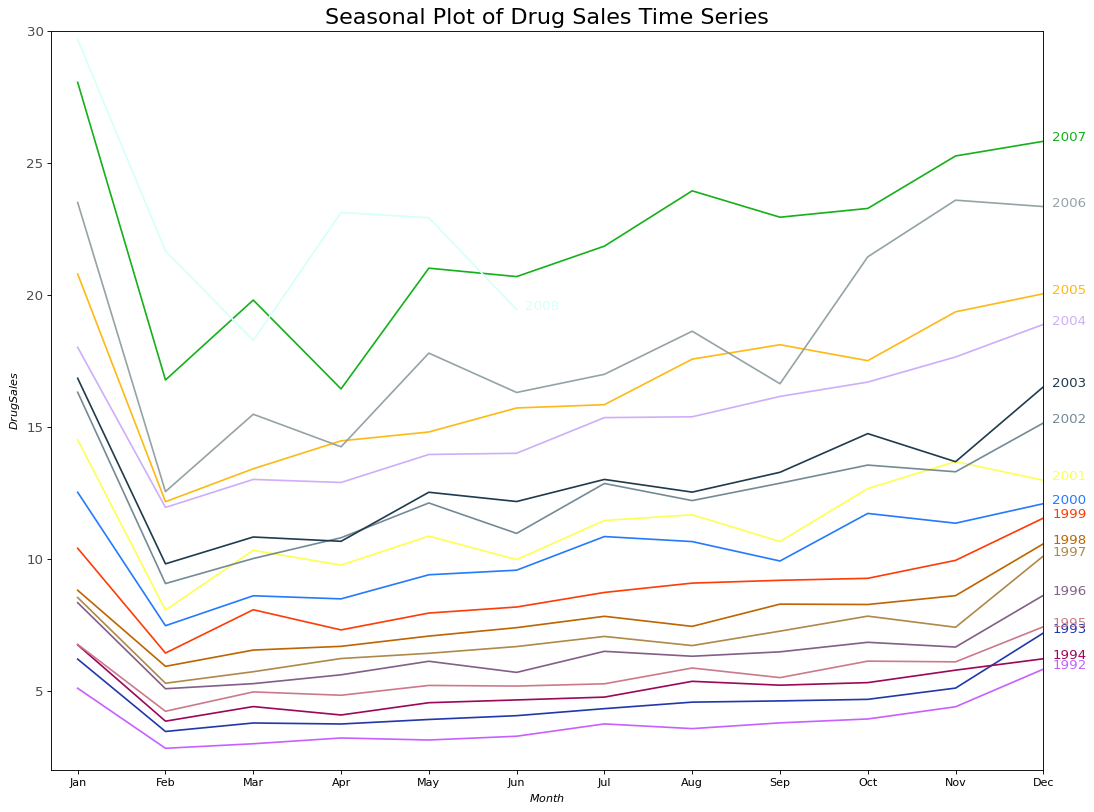

In [97]:
import matplotlib as mpl

# Import Data
df = pd.read_csv('datasets/a10.txt', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
Cross-tabs</i></p>

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_excel("datasets/sales-funnel.xlsx")
df.head()

Account                          Name            Rep       Manager  \
0   714466               Trantow-Barrows   Craig Booker  Debra Henley   
1   714466               Trantow-Barrows   Craig Booker  Debra Henley   
2   714466               Trantow-Barrows   Craig Booker  Debra Henley   
3   737550  Fritsch, Russel and Anderson   Craig Booker  Debra Henley   
4   146832                  Kiehn-Spinka  Daniel Hilton  Debra Henley   

       Product  Quantity  Price     Status  
0          CPU         1  30000  presented  
1     Software         1  10000  presented  
2  Maintenance         2   5000    pending  
3          CPU         1  35000   declined  
4          CPU         2  65000        won

In [120]:
pd.crosstab(df.Rep, df.Price)

Price          5000    7000    10000   30000   35000   40000   65000   100000
Rep                                                                          
Cedric Moss         1       0       1       1       0       0       1       0
Craig Booker        1       0       1       1       1       0       0       0
Daniel Hilton       0       0       1       0       0       1       1       0
John Smith          1       0       0       0       1       0       0       0
Wendy Yule          1       1       0       0       0       0       1       1

In [121]:
pd.crosstab(df.Rep, df.Price, margins=True, margins_name="Total")

Price          5000  7000  10000  30000  35000  40000  65000  100000  Total
Rep                                                                        
Cedric Moss       1     0      1      1      0      0      1       0      4
Craig Booker      1     0      1      1      1      0      0       0      4
Daniel Hilton     0     0      1      0      0      1      1       0      3
John Smith        1     0      0      0      1      0      0       0      2
Wendy Yule        1     1      0      0      0      0      1       1      4
Total             4     1      3      2      2      1      3       1     17

<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Heatmap Plot with crosstab</i></p>

<Axes: xlabel='Rep-Quantity', ylabel='Product-Price'>

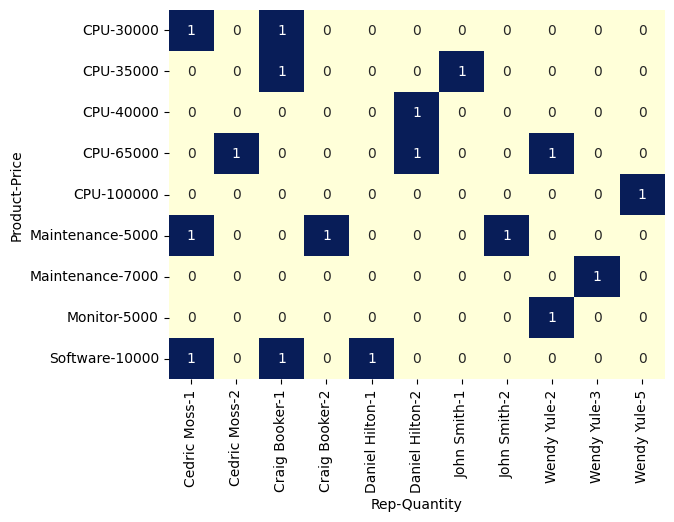

In [122]:
sns.heatmap(pd.crosstab([df.Product, df.Price], [df.Rep, df.Quantity]),
            cmap="YlGnBu", annot=True, cbar=False)

<p style="padding:10px; border-radius:5px; background-color:#3B7EA1; color:white; font-size:22px;"><i>
    Some Review Questions</i></p>

<hr />
<h2>Final review questions</h2>
<ol><li>5 short questions about coding in general, coding practices.</li>
<li>3 short coding questions.</li>
<li>1 larger coding problem (20 points) with very basic plots.</li>
<li>1 large coding question (40 pts) with data that are unfamiliar to you.</li>
</ol>
<p>
What do you know about OOD?</p>
<p>And about "design approaches"?</p>
<p>What do you know about file sizes?  what might reduce the size of one?
</p>
<p>What's python's trick for giving us info about classes? 
    [Some terms appear as functions and others as variables ... In other words, what's the difference between myfunc() and myfunc?]
</p>
<p>What happens if you call an empty function? 
</p>
<p>How do this commands vary?
What is the data type?, 
e.g. type(f), 
type(f), 
type(f())</p>
<p>
What do you know about dictionaries?  
Common application thereof?  Counting ... 
<pre>
example_text = "California is the Golden State"
{
	char:example_text.lower().count(char) 
	for char in ''.join(set(example_text)).lower() 
	if char in 'aeiou'
}</pre>
</p>
<p>
Pandas ... easiest way to pull out some but not all data
from a DataFrame?
-> could you write some iterator to pull out column data
selectively?
    </p>
    <p>
Fast way to get the sum total of a number of folk by some criteria?
e.g., df.grouppby('state').delegates.sum()
[delegates is a field, group first by state field]<p>
<p>
How do you add labels to a plot? say a line graph?</p>
<pre>
f, a = plot.subplots(2, 1, figsize=(16,10), sharex=True)
a[0].set_title("Balance")
a[0].plot(df.date, df.balance)
a[0].set_ylabel("$")

a[1] ... [same]
a[1].set_ylabel("Dhangur's house in Little Compton")
</pre>
<p>The last big question - 40 points...</p>
<p>
is this line legitimate?
cats = [cat for cat in my_file if not cat.startswith('%')]</p>

<p>Compare ... (the point is to look for shortcuts in the various libraries.  See <a href="https://the-examples-book.com/programming-languages/python/pandas-aggregate-functions#" target="new">
Examples</a>
<pre>
for range(0, n):

b = [0: agg(somecolumn)>5]
</pre>
<p>Can you write each of these?
<ol>
<li>list comprehensions</li>
<li>list comprehensions with conditions</li>
<li>slicing</li>
<li>concatenation</li>
</ol>
</p>
<p>What do you do when you face an unknown file type but must analyze its contents?</p>

<hr />
<h1>Good luck!</h1>
<p><i>On behalf of BabyKitty and myself, you'll do great on your project presentations and the final.  Cheers!</i></p>
<img src="images/BabyKitty.jpg">